In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-customer-analytics-loyalty-vs-fraud/synthetic_ecommerce_churn_dataset.csv


In [2]:
# import libraries and models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
# red and info
data_fraud = pd.read_csv("/kaggle/input/e-commerce-customer-analytics-loyalty-vs-fraud/synthetic_ecommerce_churn_dataset.csv")

data_fraud.info()
data_fraud.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   object 
 1   age                 5000 non-null   int64  
 2   gender              5000 non-null   object 
 3   country             5000 non-null   object 
 4   avg_order_value     4750 non-null   float64
 5   total_orders        5000 non-null   int64  
 6   last_purchase       5000 non-null   int64  
 7   is_fraudulent       5000 non-null   int64  
 8   preferred_category  5000 non-null   object 
 9   email_open_rate     4750 non-null   float64
 10  customer_since      5000 non-null   object 
 11  loyalty_score       5000 non-null   int64  
 12  churn_risk          5000 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 507.9+ KB


,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15


In [4]:
# filling missing values
data_fraud["avg_order_value"]=data_fraud["avg_order_value"].fillna(data_fraud["avg_order_value"].median())
data_fraud["email_open_rate"]=data_fraud["email_open_rate"].fillna(data_fraud["email_open_rate"].median())

In [5]:
data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   object 
 1   age                 5000 non-null   int64  
 2   gender              5000 non-null   object 
 3   country             5000 non-null   object 
 4   avg_order_value     5000 non-null   float64
 5   total_orders        5000 non-null   int64  
 6   last_purchase       5000 non-null   int64  
 7   is_fraudulent       5000 non-null   int64  
 8   preferred_category  5000 non-null   object 
 9   email_open_rate     5000 non-null   float64
 10  customer_since      5000 non-null   object 
 11  loyalty_score       5000 non-null   int64  
 12  churn_risk          5000 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 507.9+ KB


In [6]:
# remove less relevent feacture
new_data = data_fraud.drop(columns=["customer_id"])
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int64  
 1   gender              5000 non-null   object 
 2   country             5000 non-null   object 
 3   avg_order_value     5000 non-null   float64
 4   total_orders        5000 non-null   int64  
 5   last_purchase       5000 non-null   int64  
 6   is_fraudulent       5000 non-null   int64  
 7   preferred_category  5000 non-null   object 
 8   email_open_rate     5000 non-null   float64
 9   customer_since      5000 non-null   object 
 10  loyalty_score       5000 non-null   int64  
 11  churn_risk          5000 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 468.9+ KB


In [7]:
# mathmatics statis
new_data.describe()

,age,avg_order_value,total_orders,last_purchase,is_fraudulent,email_open_rate,loyalty_score,churn_risk
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,48.163200,107.680214,10.027000,180.073200,0.025800,50.726600,50.039400,0.284484
std,17.880797,67.593171,3.163838,104.926518,0.158554,28.361808,28.832151,0.159690
min,18.000000,10.660000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,33.000000,59.560000,8.000000,89.000000,0.000000,26.400000,25.000000,0.160000
50%,48.000000,93.190000,10.000000,178.000000,0.000000,50.950000,50.000000,0.260000
75%,64.000000,138.807500,12.000000,270.000000,0.000000,75.300000,75.000000,0.390000
max,79.000000,555.460000,23.000000,364.000000,1.000000,100.000000,99.000000,0.900000


In [8]:
# duplicate data and null
new_data.duplicated().sum()
new_data.isnull().sum()

age                   0
gender                0
country               0
avg_order_value       0
total_orders          0
last_purchase         0
is_fraudulent         0
preferred_category    0
email_open_rate       0
customer_since        0
loyalty_score         0
churn_risk            0
dtype: int64

In [9]:
# encoding
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
ar=["gender","country", "preferred_category"]
for col in ar:
    new_data[col]=lr.fit_transform(new_data[col])
new_data["customer_since"] = pd.to_datetime(new_data["customer_since"])  # change to data time  
new_data["customer_since"] = (new_data["customer_since"] - new_data["customer_since"].min()).dt.days
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int64  
 1   gender              5000 non-null   int64  
 2   country             5000 non-null   int64  
 3   avg_order_value     5000 non-null   float64
 4   total_orders        5000 non-null   int64  
 5   last_purchase       5000 non-null   int64  
 6   is_fraudulent       5000 non-null   int64  
 7   preferred_category  5000 non-null   int64  
 8   email_open_rate     5000 non-null   float64
 9   customer_since      5000 non-null   int64  
 10  loyalty_score       5000 non-null   int64  
 11  churn_risk          5000 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 468.9 KB


In [10]:
# correlation or in linear how strong conect with is_fraudulent
corr = new_data.corr()['is_fraudulent'].abs().sort_values(ascending=False)
print(corr)

is_fraudulent         1.000000
email_open_rate       0.016458
country               0.014010
avg_order_value       0.010311
gender                0.008836
last_purchase         0.007725
customer_since        0.006000
preferred_category    0.004501
loyalty_score         0.003803
churn_risk            0.003543
age                   0.003242
total_orders          0.002200
Name: is_fraudulent, dtype: float64


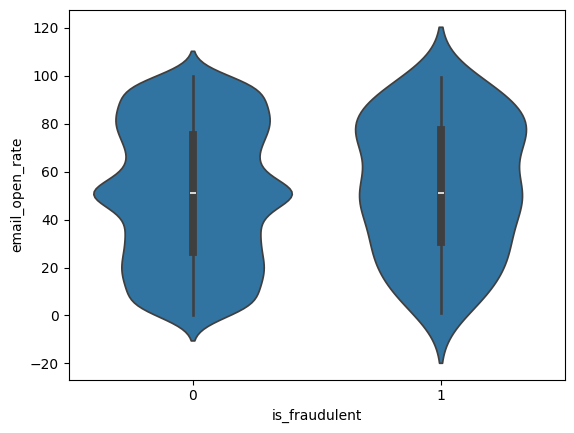

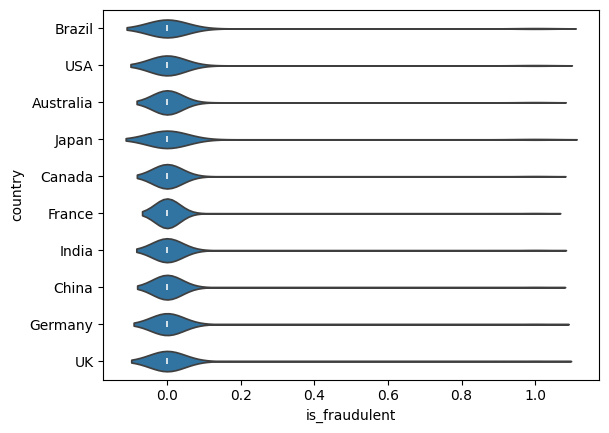

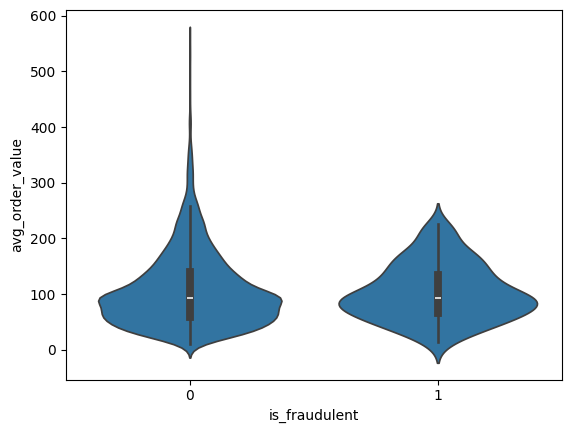

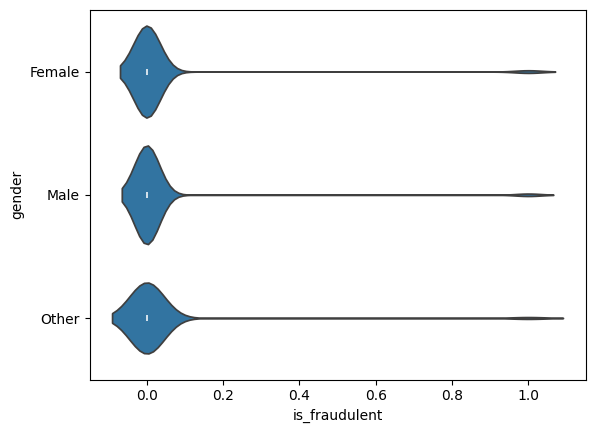

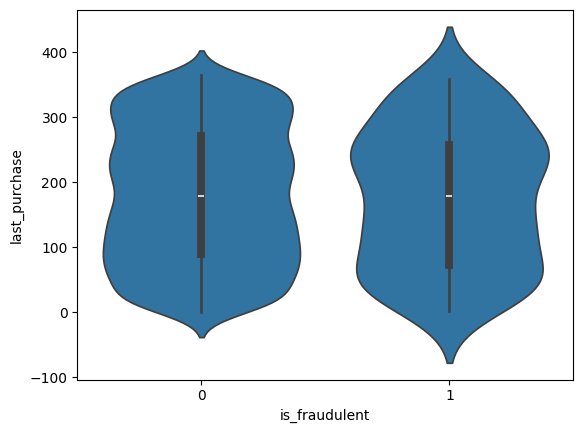

In [11]:
# graphs
list=['email_open_rate', 'country', 'avg_order_value', 'gender', 'last_purchase']
for col in list:
    sns.violinplot(x='is_fraudulent',y=col, data=data_fraud)
    plt.xlabel('is_fraudulent')
    plt.ylabel(col)
    plt.show()

In [12]:
# input and output data

X = new_data.loc[:,new_data.columns!='is_fraudulent']
y = new_data["is_fraudulent"]
column = ['age', 'total_orders','is_fraudulent']
x = new_data[new_data.columns.difference(column)]

In [13]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

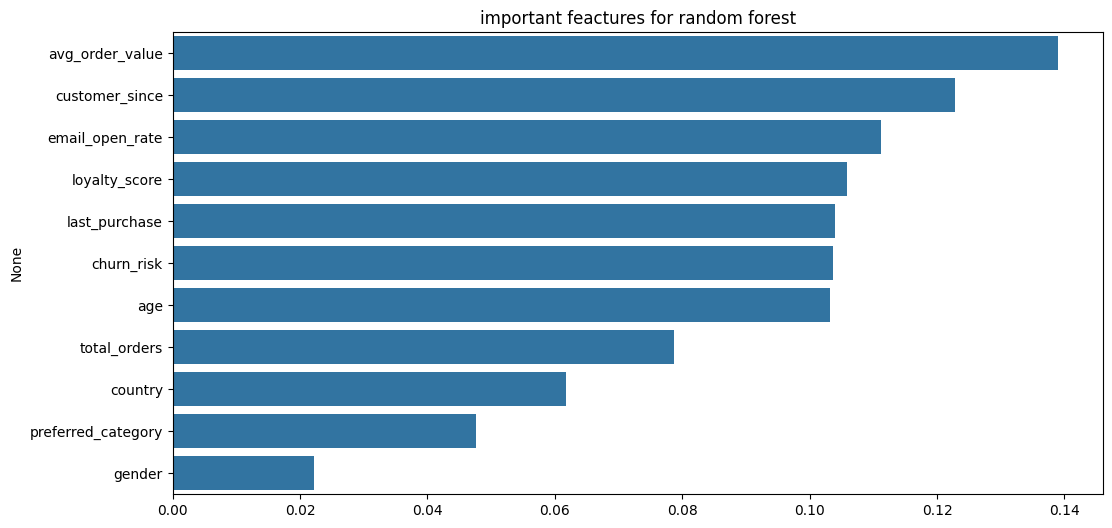

score:0.974


In [15]:
# random forest 
rf = RandomForestClassifier(n_estimators = 100,class_weight='balanced', random_state=42)
rf.fit(X_train,y_train)
y_pre=rf.predict(X_test)
fd=rf.score(X_test,y_test)
# graphical representation of important features
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=importances.values,y=importances.index)
plt.title('important feactures for random forest')
plt.show()
print(f"score:{fd}")

In [16]:
# Check the mean values for fraud(1) and not fraud(0) with difference
print("Feature means by class:")
for feature in X.columns:
    mean_0 = X[y == 0][feature].mean()
    mean_1 = X[y == 1][feature].mean()
    diff = abs(mean_1 - mean_0)
    print(f"{feature:20} | Class 0: {mean_0:.2f} | Class 1: {mean_1:.2f} | Diff: {diff:.2f}")

Feature means by class:
age                  | Class 0: 48.15 | Class 1: 48.52 | Diff: 0.37
gender               | Class 0: 0.65 | Class 1: 0.61 | Diff: 0.04
country              | Class 0: 4.47 | Class 1: 4.73 | Diff: 0.25
avg_order_value      | Class 0: 107.79 | Class 1: 103.40 | Diff: 4.40
total_orders         | Class 0: 10.03 | Class 1: 10.07 | Diff: 0.04
last_purchase        | Class 0: 180.21 | Class 1: 175.09 | Diff: 5.11
preferred_category   | Class 0: 1.97 | Class 1: 2.01 | Diff: 0.04
email_open_rate      | Class 0: 50.65 | Class 1: 53.59 | Diff: 2.94
customer_since       | Class 0: 917.93 | Class 1: 897.88 | Diff: 20.05
loyalty_score        | Class 0: 50.02 | Class 1: 50.71 | Diff: 0.69
churn_risk           | Class 0: 0.28 | Class 1: 0.28 | Diff: 0.00


 # **This is the real reason for getting wrong prediction, both fraud and not fraud are identical, and the difference is very small, like age, gender,avg_order_value and ect.**

In [17]:
# all feactures for rf
from sklearn.metrics import classification_report, roc_auc_score

y_pro = rf.predict_proba(X_test)[: ,-1]
y_pro_cus=(y_pro>=0.2).astype(int)
print(classification_report(y_test,y_pro_cus))
print("roc Aue:", roc_auc_score(y_test,y_pro  ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000

roc Aue: 0.44442031274680144


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
rf.fit(x_train,y_train)
y_pre=rf.predict(x_test)
rf.score(x_test,y_test)

0.974

In [19]:
# with except age and total orders in rf
y_pro = rf.predict_proba(x_test)[: ,-1]
y_pro_cus=(y_pro>=0.2).astype(int)
print(classification_report(y_test,y_pro_cus))
print("roc Aue:", roc_auc_score(y_test,y_pro  ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000

roc Aue: 0.6090664981835413


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

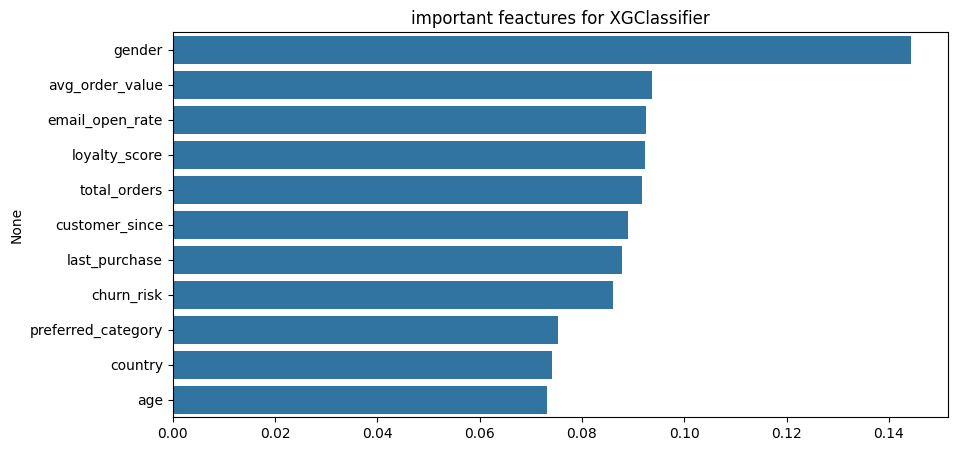

In [21]:
# graphical representation of important features on XGB
impor = pd.Series(xgb.feature_importances_,index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=impor.values, y=impor.index)
plt.title('important feactures for XGClassifier')
plt.show()


In [22]:
xgb.fit(x_train, y_train)
y_prob = xgb.predict_proba(x_test)[:, 1]
y_pred = (y_prob > 0.2).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.50      0.04      0.07        26

    accuracy                           0.97      1000
   macro avg       0.74      0.52      0.53      1000
weighted avg       0.96      0.97      0.96      1000

ROC-AUC: 0.4964460590743958


In [23]:
from sklearn.metrics import classification_report, roc_auc_score
xgb.fit(X_train, y_train)
y_prob = xgb.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.2).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000

ROC-AUC: 0.5108197757068395


# *In XGB(bost model) highly rated gender and on the other part RF(tree model) have very low rate of gender, or ignores it's noise.*
#  *Two ML models have totally different opinions on a single feature*